# <p style="padding:10px;background-color:#273c75 ;margin:0;color:#E2EEF3;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Academic Performance Prediction 💻</p>


![](https://repository-images.githubusercontent.com/295478735/4abd0000-f6e7-11ea-9205-8ea0ef6d8474)

In the context of academic performance prediction, the goal is to perform regression analysis to predict a student's percentage score based on the number of hours they have studied. This involves using a dataset with two key columns: "Hours" representing the study duration and "Scores" indicating the corresponding percentage score obtained by the student in an examination.

**Goal : To develop a predictive model that can estimate a student's percentage score based on their study hours.**

# **Import necessary libraries**

In [25]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

# **Load the dataset**

In [26]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [27]:
# Get information about the code

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [28]:
# Descriptive statistics of the dataset

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [29]:
# shape of the dataset (number of rows and columns)

df.shape

(25, 2)

In [30]:
# Check the null values in the dataset

df.isnull().sum()


Hours     0
Scores    0
dtype: int64

# **Exploratory Data Analysis**

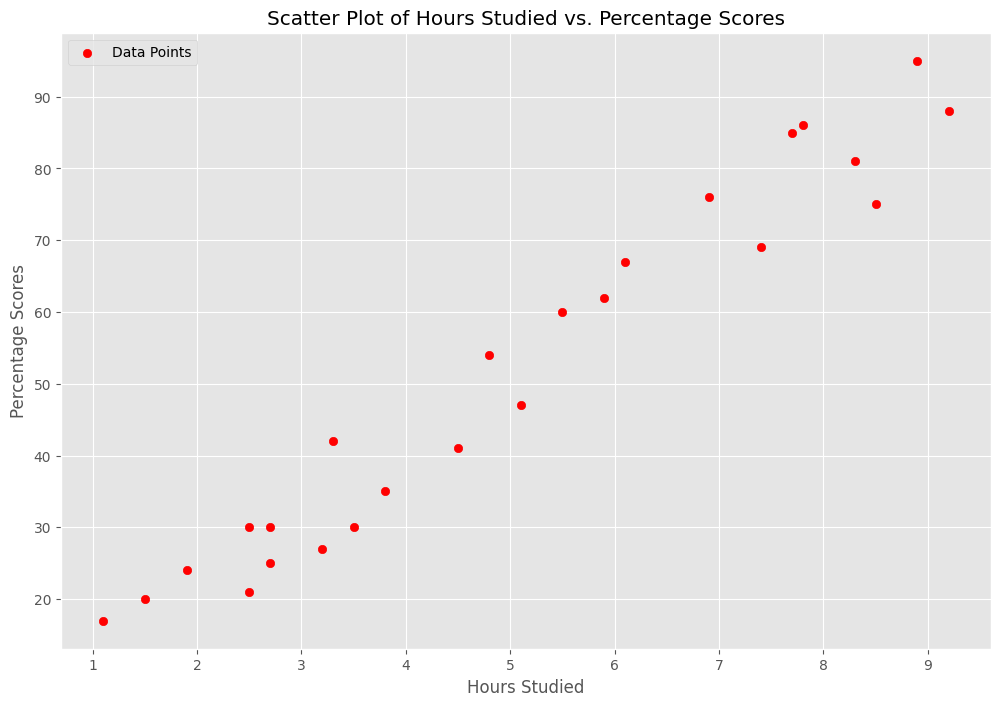

In [31]:
# Create a scatter plot

plt.figure(figsize=(12,8))
plt.scatter(df['Hours'], df['Scores'], c='red', marker='o', label='Data Points')
plt.title('Scatter Plot of Hours Studied vs. Percentage Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.legend()
plt.grid(True)

Text(0, 0.5, 'Frequency')

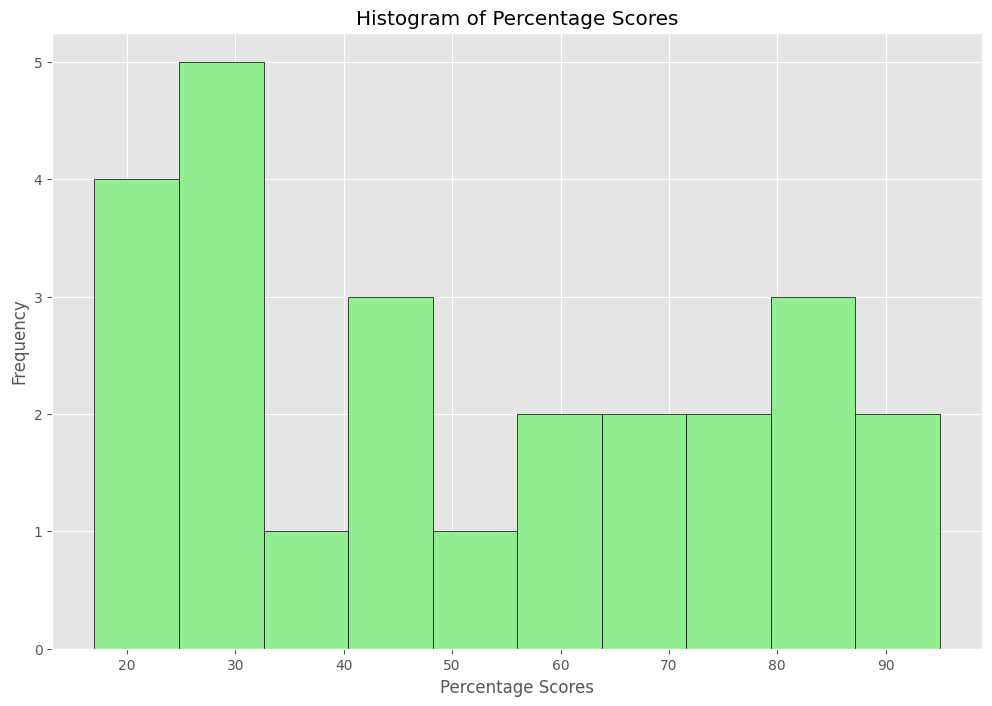

In [32]:
# Create a histogram of Percentage Scores

plt.figure(figsize=(12,8))
plt.hist(df['Scores'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of Percentage Scores')
plt.xlabel('Percentage Scores')
plt.ylabel('Frequency')


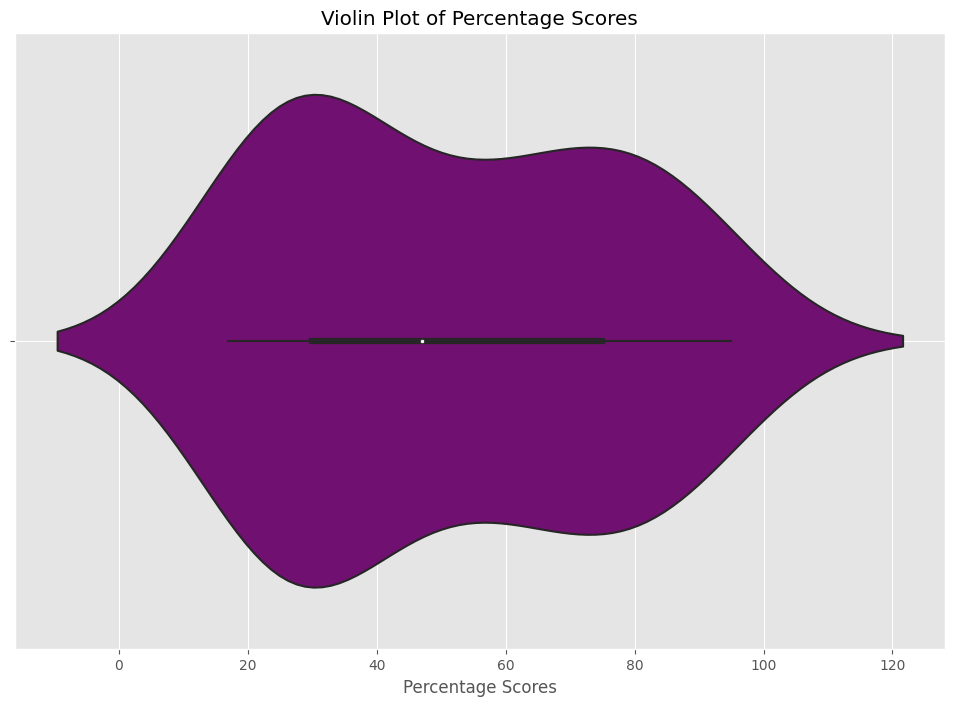

In [33]:
# Create a violin plot of Percentage Scores

plt.figure(figsize=(12,8))
sns.violinplot(x='Scores', data=df, color='purple', style='event')
plt.title('Violin Plot of Percentage Scores')
plt.xlabel('Percentage Scores')
plt.grid(True)

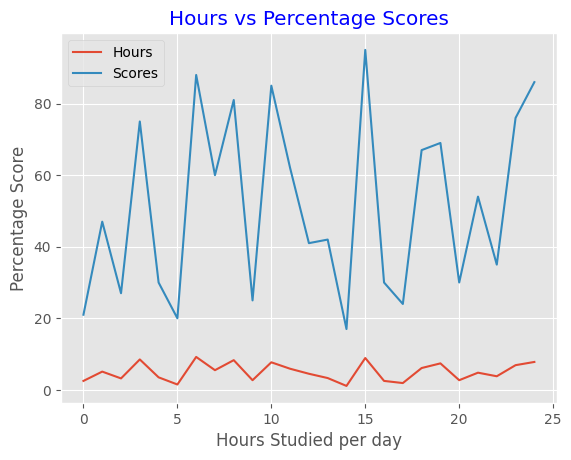

In [34]:
# Plotting the dataset

plt.style.use('ggplot')
df.plot(kind='line')
plt.title('Hours vs Percentage Scores', color='blue')
plt.xlabel('Hours Studied per day')
plt.ylabel('Percentage Score')
plt.show()

# **Model Training**

The next step is to divide the data into 'attributes'(inputs) and 'labels'(output)

In [35]:
X = df.iloc[:,:-1].values  #Independent variable ('Hours')
Y = df.iloc[:,1].values    #Dependent Variable ('Scores')

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Split the dataset into teting and training sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# **Model**

In [38]:
# Model training

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
print('Training completed')

Training completed


In [39]:
# Plotting the regression line
line = regressor.coef_* X + regressor.intercept_


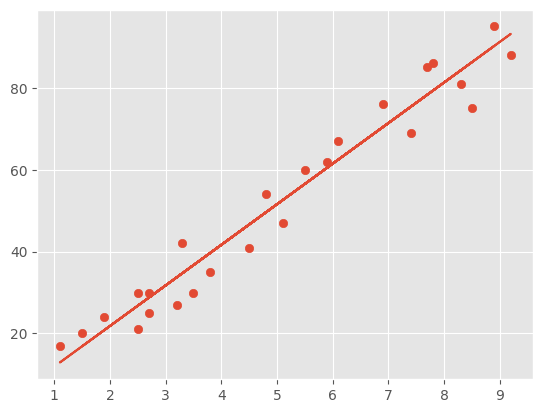

In [40]:
# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line)
plt.show()

# **Making Predictions**

In [41]:
y_pred = regressor.predict(X_test)  

In [42]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [43]:
#Manual test. test with your own data
hours = 9.25
predicted = regressor.predict([[hours]])
print("Number of hours =", hours)
print("Predicted score is =", predicted[0])


Number of hours = 9.25
Predicted score is = 93.69173248737539


In [44]:
# Evaluate the model

from sklearn import metrics  
mae = metrics.mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mae)
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R-Squared:',metrics.r2_score(Y_test, y_pred))


Mean Absolute Error: 4.183859899002982
RMSE: 4.647447612100373
R-Squared: 0.9454906892105354
